# Validacao Cruzada Series Temporais

#### **Contextualização**

Neste projeto, o foco é preparar um conjunto de dados de temperatura coletados ao longo do tempo durante um processo industrial de fundição de metais. A equipe de engenharia está desenvolvendo um modelo preditivo para estimar a temperatura futura do processo, com o objetivo de otimizar o controle e prevenir falhas operacionais.

Nesta etapa, será feita a divisão adequada do banco de dados temporal, considerando as particularidades de séries temporais, com o intuito de garantir uma avaliação justa e representativa da performance do modelo preditivo em fases futuras.

Para isso, será aplicada a técnica de validação cruzada para séries temporais, respeitando a ordem cronológica dos dados e evitando vazamento de informações.

O dataset utilizado encontra-se no arquivo df_metais.xlsx.

In [1]:
import pandas as pd
df = pd.read_excel('df_metais.xlsx')

In [2]:
df.head()

,Timestamp,Temperatura
0,2024-01-01 00:00:00,377.483571
1,2024-01-01 01:00:00,374.308678
2,2024-01-01 02:00:00,378.238443
3,2024-01-01 03:00:00,382.615149
4,2024-01-01 04:00:00,373.829233


In [3]:
df.describe()

,Temperatura
count,1000.000000
mean,375.096660
std,4.896080
min,358.793663
25%,371.762048
50%,375.126503
75%,378.239719
max,394.263657


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Temperatura  1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(1000, 2)

In [7]:
type(df['Timestamp'].values[0])

str

In [8]:
# Converter a coluna Timestamp para 'datetime'
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    1000 non-null   datetime64[ns]
 1   Temperatura  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


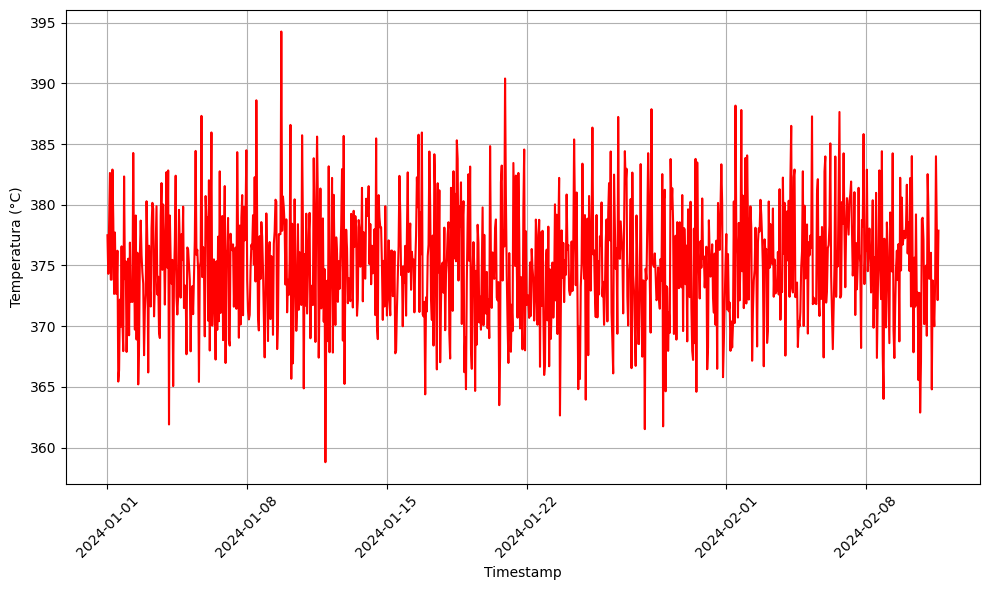

In [10]:
# Gráfico da série temporal contida no banco de dados
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['Timestamp'], df['Temperatura'], color='red')

plt.xlabel('Timestamp')
plt.ylabel('Temperatura (°C)')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df_filtrado = df.loc[(df['Temperatura'] >= 365) & (df['Temperatura'] <= 385)]

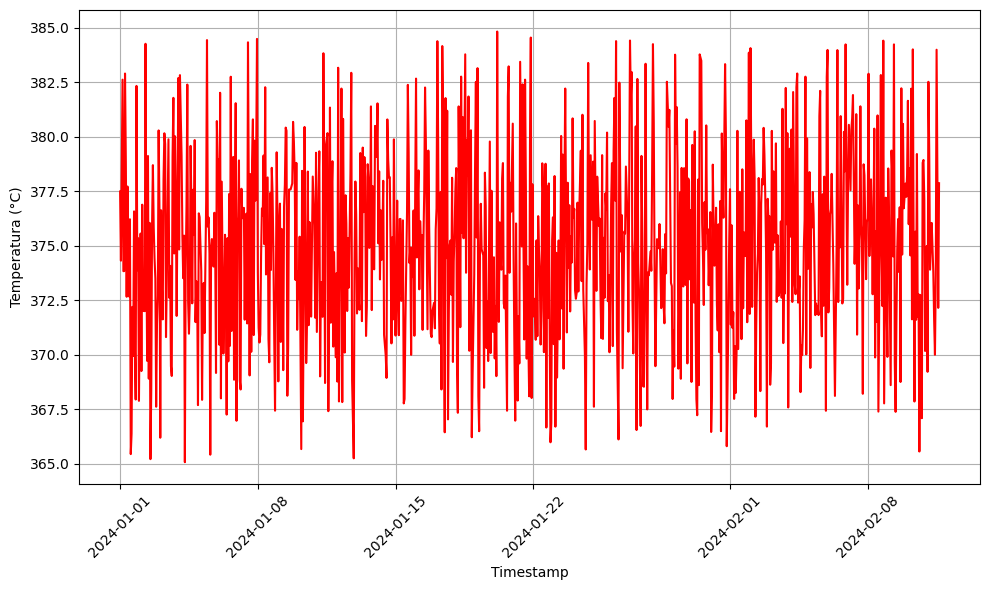

In [12]:
# Gráfico da série temporal contida no banco de dados
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df_filtrado['Timestamp'], df_filtrado['Temperatura'], color='red')

plt.xlabel('Timestamp')
plt.ylabel('Temperatura (°C)')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4 - Divisão adequada do banco de dados para realizar uma futura validação cruzada

In [13]:
# Importar o método TimeSeriesSPplit do scikit-learn
from sklearn.model_selection import TimeSeriesSplit

In [14]:
# Instanciar o método que faz a divisão do banco de dados
k = 4
tscv = TimeSeriesSplit(n_splits=k)

In [15]:
# 'Loop' para viabilizar dividir o banco de dados de acordo com o número de partições k previamente definidas
c = 1 # Definindo um contador para o 'loop'
folds_data = {} # Definindo um dicionário para armazenar os bancos de dados devidamente dividido em k partições
folds_index = {}

for train_index, assessment_index in tscv.split(df):
  train_data, assessment_data = df.loc[train_index], df.iloc[assessment_index]
  folds_data[c] = {'Train data': train_data, 'Assessment data': assessment_data}
  folds_index[c] = {'Train index': train_data, 'Assessment data': assessment_index}

  c = c + 1

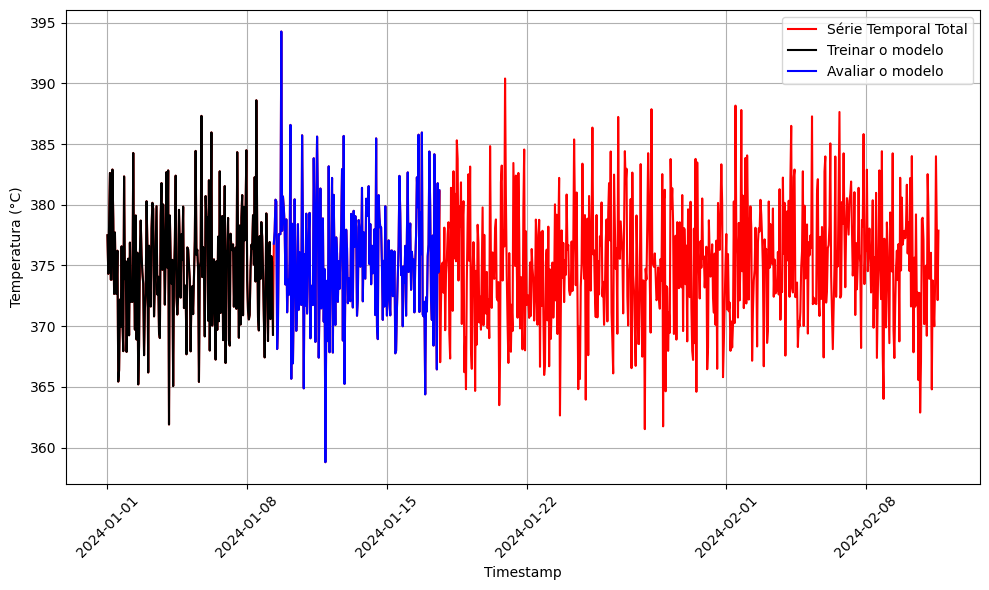

In [16]:
# Avaliando graficamente a divisão do banco de dados
k = 1

plt.figure(figsize=(10,6))
plt.plot(df['Timestamp'], df['Temperatura'], 'r-', label='Série Temporal Total')
plt.plot(folds_data[k]['Train data']['Timestamp'], folds_data[k]['Train data']['Temperatura'], 'k-', label='Treinar o modelo')
plt.plot(folds_data[k]['Assessment data']['Timestamp'], folds_data[k]['Assessment data']['Temperatura'], 'b-', label='Avaliar o modelo')

plt.xlabel('Timestamp')
plt.ylabel('Temperatura (°C)')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()